In [1]:
cog_key = 'aaafdfa6aeb249cbbaa52a601eca7a6f'
cog_endpoint = 'https://license-plate-extraction.cognitiveservices.azure.com/'

print('Ready to use cognitive services at {} using key {}'.format(cog_endpoint, cog_key))

Ready to use cognitive services at https://license-plate-extraction.cognitiveservices.azure.com/ using key aaafdfa6aeb249cbbaa52a601eca7a6f


In [2]:
! pip install azure-cognitiveservices-vision-computervision 

Ancient India
chapters :
1. pre-historic culture / 1.4 million yrs ago - 2500BC
(Earliat) .
2. Indus valley Civilization / 2500 - 1500 BL
3. Vedic/-Aryan civilization / 1500- 600BC]
4. Pre -mauryan Age (600-3008C)
5. Mauryan Age / 300 - 200 BL ]
com
6 . Post - Mauryan Age ( 200 -
blogsto
7. Gupthan Age [ 800-550AD
8. Post- Gupthan Period [550- 150 AD]




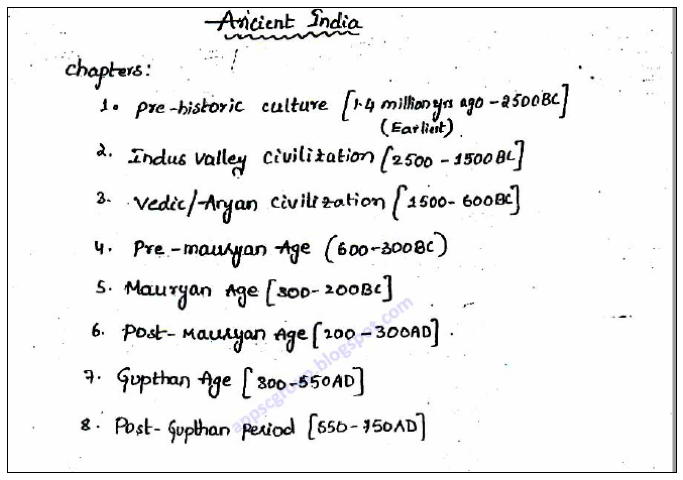

In [6]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials
import matplotlib.pyplot as plt
from PIL import Image
import time
import os
%matplotlib inline

# Read the image file
image_path = os.path.join('handwriting.png')
image_stream = open(image_path, "rb")

# Get a client for the computer vision service
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))

# Submit a request to read printed text in the image and get the operation ID
read_operation = computervision_client.read_in_stream(image_stream, raw=True)
operation_location = read_operation.headers["Operation-Location"]
operation_id = operation_location.split("/")[-1]

# Wait for the asynchronous operation to complete
while True:
    read_results = computervision_client.get_read_result(operation_id)
    if read_results.status not in [OperationStatusCodes.running]:
        break
    time.sleep(1)

# If the operation was successfuly, process the text line by line
if read_results.status == OperationStatusCodes.succeeded:
    for result in read_results.analyze_result.read_results:
        for line in result.lines:
            print(line.text)

# Open image and display it.
print('\n')
fig = plt.figure(figsize=(12,12))
img = Image.open(image_path)
plt.axis('off')
plt.imshow(img)